In [1]:
import pandas as pd

import rangekeeper as rk

In [2]:
period_type = rk.periodicity.Type.YEAR
span = rk.span.Span.from_num_periods(
    name="Span",
    date=pd.Timestamp(2001, 1, 1),
    period_type=period_type,
    num_periods=25)
sequence = span.to_index(period_type=period_type)
span

Span: Span
Start Date: 2001-01-01
End Date: 2025-12-31

In [3]:
cap_rate = .05
growth_rate = -.0005

In [4]:
trend = rk.dynamics.trend.Trend(
    sequence=sequence,
    cap_rate=cap_rate,
    growth_rate=growth_rate)
print('Growth Rate: {:.4%}'.format(trend.growth_rate))
print('Initial Value: {:.4%}'.format(trend.initial_value))

Growth Rate: -0.0500%
Initial Value: 5.0000%


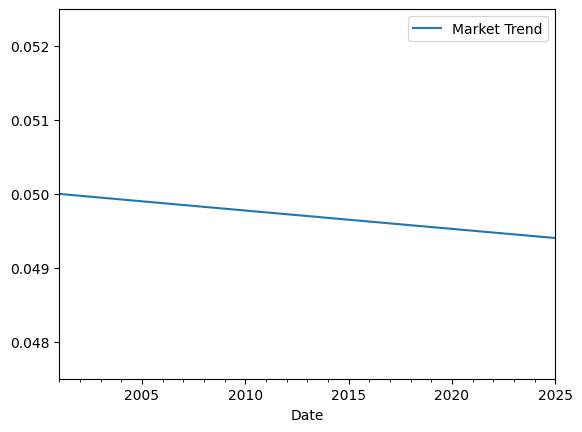

In [5]:
trend.plot(bounds=(0.0475, 0.0525))

In [6]:
volatility_per_period = .1
autoregression_param = .2
mean_reversion_param = .3
volatility = rk.dynamics.volatility.Volatility(
    sequence=sequence,
    trend=trend,
    volatility_per_period=volatility_per_period,
    autoregression_param=autoregression_param,
    mean_reversion_param=mean_reversion_param)

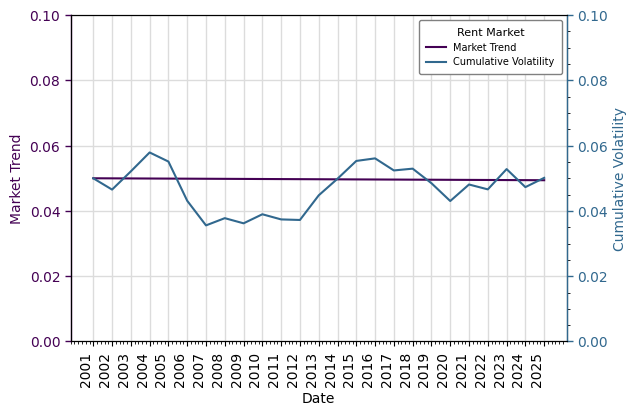

In [7]:
rent_market = rk.flux.Stream(
    name='Rent Market',
    flows=[
        volatility,
        trend
        ],
    period_type=period_type)
rent_market.plot(
    flows={
        'Market Trend': (0., .1),
        'Cumulative Volatility': (0., .1),
        }
    )

In [8]:
cyclicality = rk.dynamics.cyclicality.Cyclicality.from_estimates(
    space_cycle_phase_prop=0,
    space_cycle_period=13.8,
    space_cycle_height=1,
    space_cycle_asymmetric_parameter=.5,
    asset_cycle_period_diff=0.8,
    asset_cycle_phase_diff_prop=-.05,
    asset_cycle_amplitude=.02,
    asset_cycle_asymmetric_parameter=.5,
    sequence=sequence)

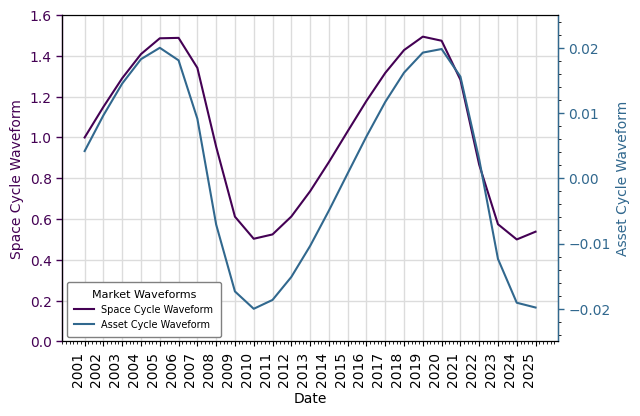

In [9]:
market_waves = rk.flux.Stream(
    name='Market Waveforms',
    flows=[cyclicality.space_waveform, cyclicality.asset_waveform],
    period_type=period_type)
market_waves.plot(
    flows={
        'Space Cycle Waveform': (0, 1.6),
        'Asset Cycle Waveform': (-0.025, 0.025)
        }
    )

In [10]:
noise = rk.dynamics.noise.Noise(
    sequence=sequence,
    noise_dist=rk.distribution.Symmetric(
        type=rk.distribution.Type.TRIANGULAR,
        residual=.1))

In [11]:
black_swan = rk.dynamics.black_swan.BlackSwan(
    sequence=sequence,
    likelihood=.05,
    dissipation_rate=mean_reversion_param,
    probability=rk.distribution.Uniform(),
    impact=-.25)

In [12]:
market = rk.dynamics.market.Market(
    sequence=sequence,
    trend=trend,
    volatility=volatility,
    cyclicality=cyclicality,
    noise=noise,
    black_swan=black_swan)

In [13]:
table = rk.flux.Stream(
    name='Market Dynamics',
    flows=[
        market.trend,
        market.volatility.volatility,
        market.volatility.autoregressive_returns,
        market.volatility,
        market.cyclicality.space_waveform,
        market.space_market,
        market.cyclicality.asset_waveform,
        market.asset_market,
        market.asset_true_value,
        market.space_market_price_factors,
        market.noisy_value,
        market.historical_value,
        market.implied_rev_cap_rate,
        market.returns
        ],
    period_type=period_type)
table

date,Market Trend,Volatility,Autoregressive Returns,Cumulative Volatility,Space Cycle Waveform,Space Market,Asset Cycle Waveform,Asset Market,Asset True Value,Space Market Price Factors,Noisy Value,Historical Value,Implied Cap Rate,Returns
2001,0.05,-0.09,-0.09,0.05,1.00,0.05,0.00,0.05,1.09,1.00,1.04,1.04,0.05,0.27
2002,0.05,-0.05,-0.07,0.05,1.15,0.05,0.01,0.04,1.33,1.07,1.33,1.33,0.05,0.49
2003,0.05,0.11,0.10,0.05,1.29,0.07,0.01,0.04,1.90,1.35,1.98,1.98,0.04,0.19
2004,0.05,0.10,0.12,0.06,1.41,0.08,0.02,0.03,2.57,1.63,2.36,2.36,0.03,0.05
2005,0.05,-0.03,-0.01,0.06,1.49,0.08,0.02,0.03,2.73,1.64,2.49,2.49,0.03,-0.43
2006,0.05,-0.19,-0.19,0.04,1.49,0.06,0.02,0.03,2.01,1.28,1.89,1.42,0.03,-0.28
2007,0.05,-0.18,-0.22,0.04,1.34,0.05,0.01,0.04,1.17,0.95,1.23,1.01,0.04,-0.45
2008,0.05,-0.01,-0.06,0.04,0.95,0.04,-0.01,0.06,0.63,0.72,0.63,0.56,0.04,-0.44
2009,0.05,-0.13,-0.14,0.04,0.61,0.02,-0.02,0.07,0.33,0.44,0.34,0.31,0.06,-0.17
2010,0.05,-0.01,-0.04,0.04,0.50,0.02,-0.02,0.07,0.28,0.39,0.27,0.26,0.08,0.11


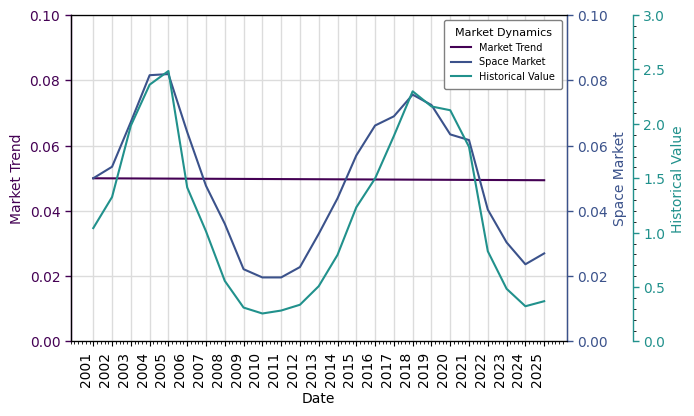

In [14]:
table.plot(
        flows={
            'Market Trend': (0, .1),
            'Space Market': (0, .1),
            'Historical Value': (0, 3)
            }
        )

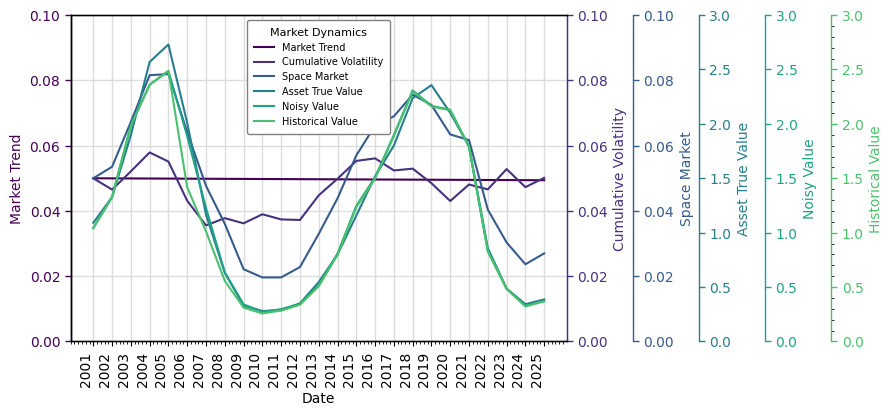

In [15]:
table.plot(
        flows={
            'Market Trend': (0, .1),
            'Cumulative Volatility': (0, .1),
            'Space Market': (0, .1),
            'Asset True Value': (0, 3),
            'Noisy Value': (0, 3),
            'Historical Value': (0, 3)
            }
    )